In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
from training.networks_stylegan3 import Generator
from torchvision.transforms import ToTensor
from glob import glob
from PIL import Image
from tqdm import tqdm

In [2]:
#folder_location_sg3_4k = "outputs/p000000/g4_m0.25_n1024"
folder_location_sg3_4k = "outputs/p000000/g4_m1_n4096"
folder_location_sg3_1k = "outputs/p000000/s0_s0_sc1_sc1_n1"

list_4k = []
for imgs in tqdm(sorted(glob(os.path.join(folder_location_sg3_4k, '*.png'))), desc="4k"):
    # load img
    img = Image.open(imgs)
    list_4k.append(ToTensor()(img))

width = list_4k[0].shape[1]
height = list_4k[0].shape[2]
list_1k_b, list_1k_l = [], []
from PIL.Image import Resampling

output_folder_for_upsampled = "outputs/p000000/upsampled_4k_n4096"
if not os.path.exists(output_folder_for_upsampled):
        os.makedirs(output_folder_for_upsampled)
for imgs in tqdm(sorted(glob(os.path.join(folder_location_sg3_1k, '*.png'))), desc="upsampling"):
    # load img
    oimg = Image.open(imgs)
    img = oimg.resize((width, height), Resampling.BILINEAR) 

    if not os.path.exists(os.path.join(output_folder_for_upsampled, os.path.basename(imgs))):
        img.save(os.path.join(output_folder_for_upsampled, f"l_{os.path.basename(imgs)}" ))
    list_1k_b.append(ToTensor()(img))
    # do LANZOS upsampling, 4x increase
    img = oimg.resize((width, height), Resampling.LANCZOS) 
    ## check if the file exists, if not create it
    if not os.path.exists(os.path.join(output_folder_for_upsampled, os.path.basename(imgs))):
        img.save(os.path.join(output_folder_for_upsampled,f"b_{os.path.basename(imgs)}"))
    list_1k_l.append(ToTensor()(img))
    # oimg = Image.open(imgs)

# create grid, of 4x4, of difference between the images
import torch
import torchvision

diff_list, diff_list_l = [], []
for img1, img_b, img_l in zip(list_4k, list_1k_b, list_1k_l):
    diff_list.append(torch.pow(img1 - img_b, 2)) 
    diff_list_l.append(torch.pow(img1 - img_l, 2))

#diff_grid = torchvision.utils.make_grid(diff_list, nrow=4)

upsampling: 100%|██████████| 16/16 [02:43<00:00, 10.23s/it]


In [18]:
selected = list(range(16))
discrete_hot = plt.get_cmap('plasma',16)
folder_location = 'outputs/diff_1k_sp_n/'
if not os.path.exists(folder_location):
    os.makedirs(folder_location)

with open(f"{folder_location}diff.txt", "w") as diff_file:
    diff_file.write("Bilinear MSE diff from SG3 spacial mixing\n")
    for i in selected:
        diff_file.write(f"mean: {torch.mean(diff_list[i])}, std: {torch.std(diff_list[i])}, sum: {torch.sum(diff_list[i])}\n")
    diff_file.write("Lanzos MSE diff from SG3 spacial mixing\n")
    for i in selected:
        diff_file.write(f"mean: {torch.mean(diff_list_l[i])}, std: {torch.std(diff_list_l[i])}, sum: {torch.sum(diff_list[i])}\n")

import matplotlib.pyplot as plt

# for i in selected:
#     diff_grid = torchvision.utils.make_grid([diff_list[i], diff_list_l[i]], nrow=2, padding=0)
#     diff_grid = torchvision.transforms.Grayscale(num_output_channels=1)(diff_grid)
#     diff_grid = diff_grid / diff_grid.max()
#     # bucket images into 16 bins
#     diff_grid = torch.bucketize(diff_grid, torch.linspace(0, 1, 16))

#     plt.imshow(diff_grid.permute(1, 2, 0), cmap= discrete_hot) #'tab20c') # discrete_hot
#     plt.axis('off') 
#     # add barplot, same size as the image, removing the text
#     #plt.colorbar(ticks=np.linspace(0, 1, 16), orientation='horizontal')
#     plt.savefig(f"{folder_location}diff_{i}.png", bbox_inches='tight', pad_inches=0)
#     plt.close()

# make grid of only one diff_list
diff_grid = torchvision.utils.make_grid(diff_list_l, nrow=4, padding=0)
diff_grid = torchvision.transforms.Grayscale(num_output_channels=1)(diff_grid)
diff_grid = diff_grid / diff_grid.max()
# bucket images into 16 bins
diff_grid = torch.bucketize(diff_grid, torch.linspace(0, 1, 16))
plt.imshow(diff_grid.permute(1, 2, 0), cmap= discrete_hot) 
plt.axis('off')

plt.savefig(f"{folder_location}diff_grid_l.png", bbox_inches='tight', pad_inches=0)
plt.close()


In [7]:
discrete_hot = plt.get_cmap('plasma',16)

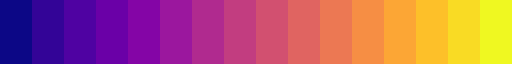

In [15]:
discrete_hot

In [16]:
torch.sum(diff_grid == 2)

tensor(0)

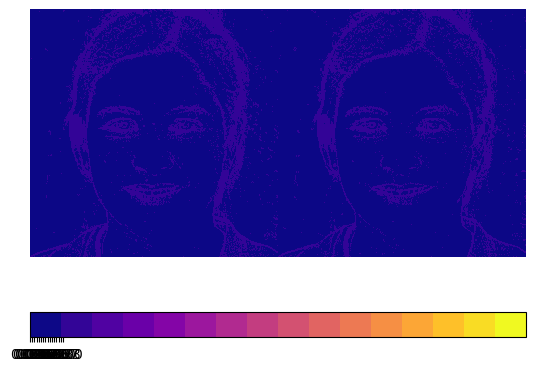

In [10]:
selected = [0]
discrete_hot = plt.get_cmap('plasma',16)
import matplotlib.pyplot as plt
#for i in selected:
i = 0

diff_grid = torchvision.utils.make_grid([diff_list[i], diff_list_l[i]], nrow=2, padding=0)
diff_grid = torchvision.transforms.Grayscale(num_output_channels=1)(diff_grid)



diff_grid = diff_grid / diff_grid.max()
# bucket images into 16 bins
diff_grid = torch.bucketize(diff_grid, torch.linspace(0, 1, 16))
# convert to RGB
# diff_grid = torchvision.transforms.ToPILImage()(diff_grid)
plt.imshow(diff_grid.permute(1, 2, 0), cmap= discrete_hot) #'tab20c') # discrete_hot
plt.axis('off') 
# add barplot, same size as the image, removing the text
plt.colorbar(ticks=np.linspace(0, 1, 16), orientation='horizontal')
plt.show()


In [6]:
# count the number of pixels that have specific value i.e. tensor == 1
# find each 10% medians
tt - tt1

tensor(0.0098)

In [ ]:
#[(t.max(), t.min()) for t in diff_list]

In [ ]:
# visualize with heatmap, diff = diff_list[selected_img]
selected_img = 0


In [ ]:
selected_img = 0
from torchvision.transforms import ToPILImage
# display the selected image, for both 1k and 4k and the difference between them
# make torchvision grid of 3 images
img1 = list_1k[selected_img]
img2 = list_4k[selected_img]
diff = diff_list[selected_img]
g = torchvision.utils.make_grid([img1, img2, diff], nrow=3)
#torchvision.utils.save_image(g, f"outputs/compare_1k_4k_s{selected_img}.jpg")
ToPILImage()(g)
